In [1]:
from marsvision.pipeline.Model import Model
from marsvision.utilities.DataUtility import DataUtility
from sklearn.ensemble import RandomForestClassifier
import os
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
# Load in data using our DataUtility
loader = DataUtility("../../mars-dataset")
loader.data_reader()
loader.data_transformer()
data = loader.df
rf = RandomForestClassifier(n_estimators = 500)
data.head()

,0,1,2,3,4,5,class,file_name,class_code
0,0.471296,119.958439,-0.000956,32.144038,169.758423,1053.143289,dust,ESP_011492_1260_RED.NOMAP.browse-Block-2.jpg,0
1,0.085602,21.821133,0.000091,26.659139,163.944968,387.122159,dust,ESP_011492_1260_RED.NOMAP.browse-Block-3.jpg,0
2,0.063896,16.289339,0.000134,27.413486,193.381032,483.033577,dust,ESP_011492_1260_RED.NOMAP.browse-Block-7.jpg,0
3,0.028911,7.371473,0.000451,26.858970,146.070319,749.250395,dust,ESP_011492_1260_RED.NOMAP.browse-Block-8.jpg,0
4,0.000000,0.000000,-0.002283,3.692830,196.721007,1060.959619,dust,ESP_012326_2125_RED.NOMAP.browse-Block-1.jpg,0


In [3]:
# Set class labels (boolean 1 == true, 0 == false)
labels = [1 if name == "dust" else 0 for name in loader.labels]

In [4]:
# Pass an sklearn model into the model class and train it
rf = RandomForestClassifier(n_estimators = 500)
model = Model(rf, "sklearn", training_images = loader.images, training_labels = labels)

In [5]:
model.train_model()

In [13]:
# Try out saving/loading a model with cross validation results while we're at it
model.save_model()
model.cross_validate()
model.write_cv_results()



In [6]:
# Run a sliding window across the image, 
# make predictions on each segment,
# show the image segments and their predictions using subplots

def plot_windows(window_length, window_height, image, stride_x, stride_y):
    fig=plt.figure(figsize=(16, 16))
    columns = math.ceil(image.shape[1] / stride_x)
    rows = math.ceil(image.shape[0] / stride_y)
    
    # Windows to show with subplots
    windows = []
    # Model predictions
    classes = []
    
    # OpenCV image shape:
    # (height, width, depth)
    # OpenCV image slicing:
    # image[top:bottom, left:right]
    
    for y in range(0, image.shape[0], stride_x):
        for x in range(0, image.shape[1], stride_y):
            # handle the case 
            # where the remainder of the image in one axis is smaller
            # than the window's size on that axis
            # when the window hits the edge of the image
            y_slice = min(image.shape[0] - y, window_height)
            x_slice = min(image.shape[1] - x, window_length)
            window = image[y:y_slice + y + 1, x:x_slice + x + 1]
            windows.append(window)
            prediction = model.predict(window)
            classes.append(prediction)
            
    for i  in range(rows * columns):
        ax = fig.add_subplot(rows, columns, i + 1)
        plt.imshow(windows[i])
        plt.annotate(str(classes[i]), xy=(windows[i].shape[1] / 2, windows[i].shape[0] / 2), ha="center")
        plt.axis("off")
    plt.show()

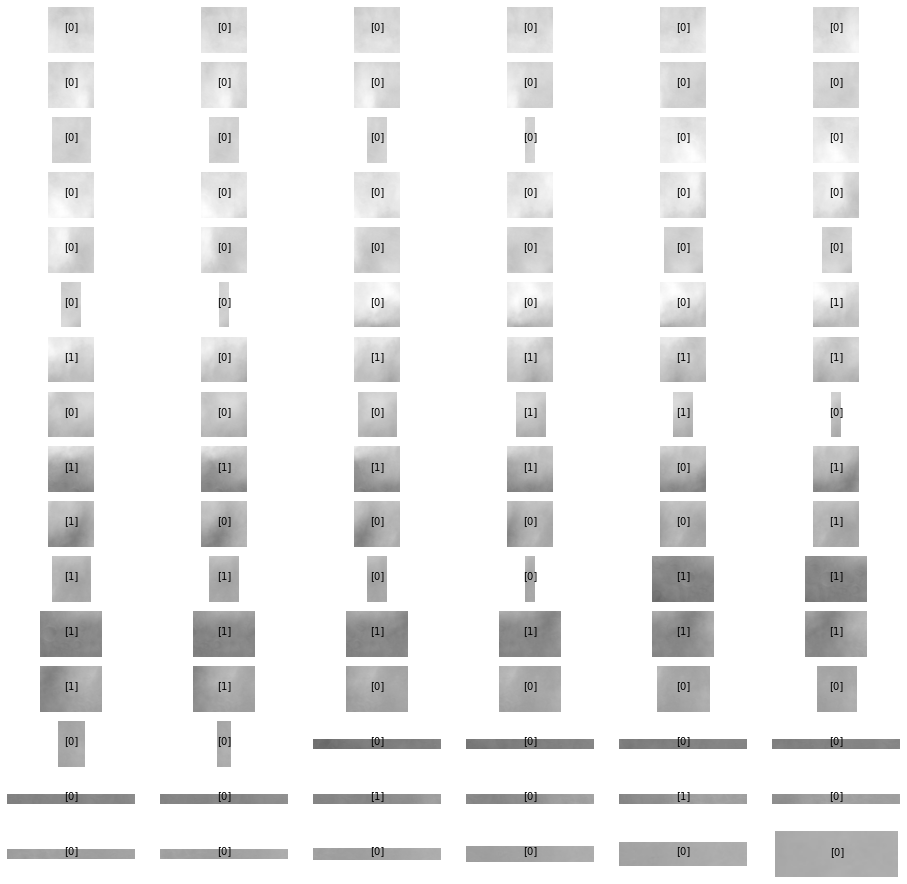

In [7]:
# Test the algorithm with funky numbers
plot_windows(300, 300, loader.images[4], 200, 64)

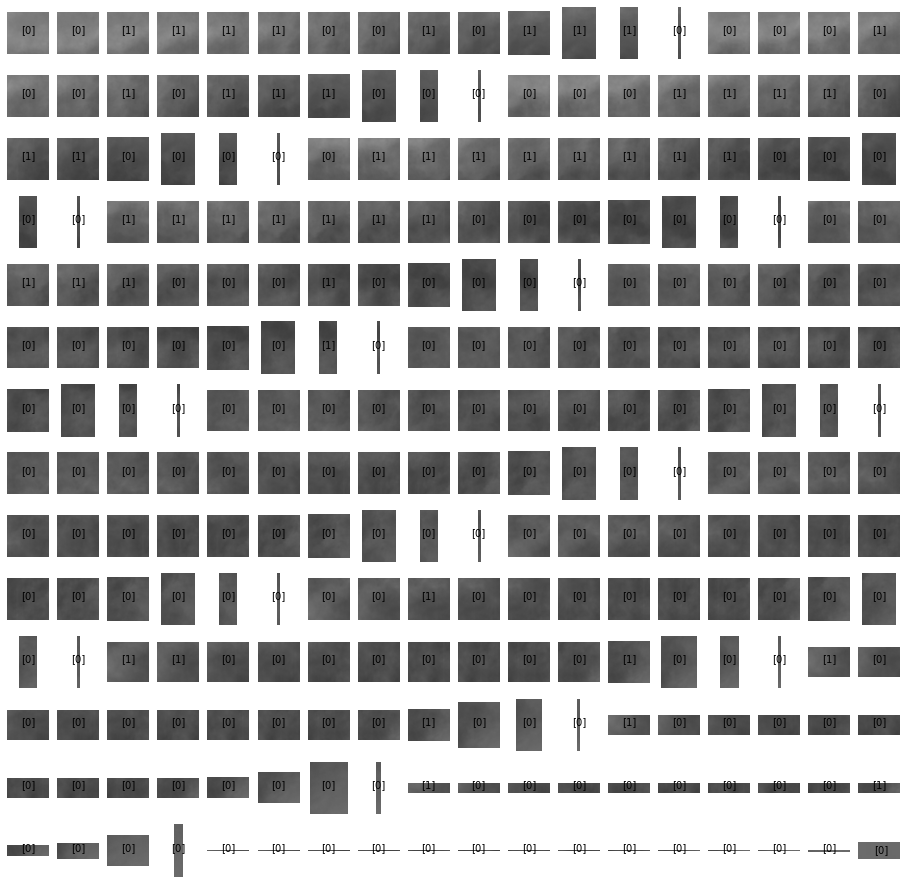

In [8]:
plot_windows(256, 256, loader.images[250], 60, 78)

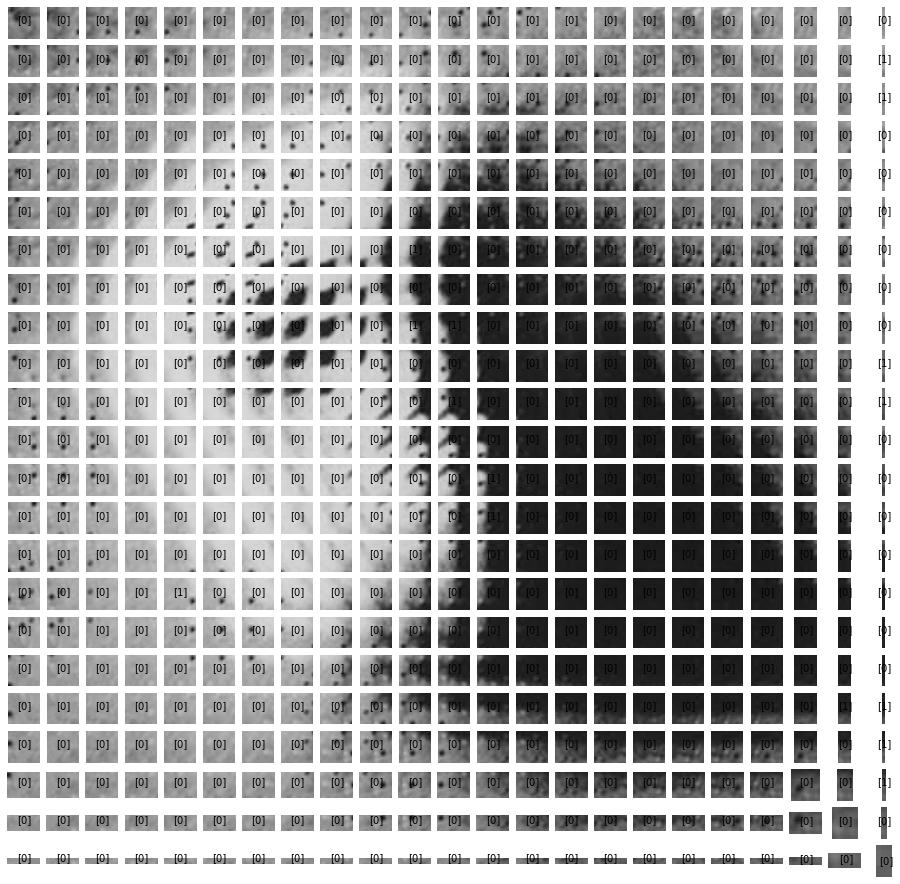

In [9]:
marsface = cv2.imread("marsface.jpg")
plot_windows(32, 32, marsface, 10, 10)